In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Text(0.5, 1.0, 'Label: 0\n')

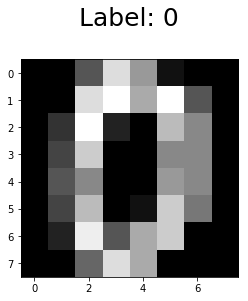

In [3]:
digits = load_digits()
plt.imshow(np.reshape(digits.data[0], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[0], fontsize=25)

In [4]:
digits.keys()

dict_keys(['images', 'data', 'target', 'target_names', 'DESCR'])

In [5]:
test_size = 0.25

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.data[0].shape

(64,)

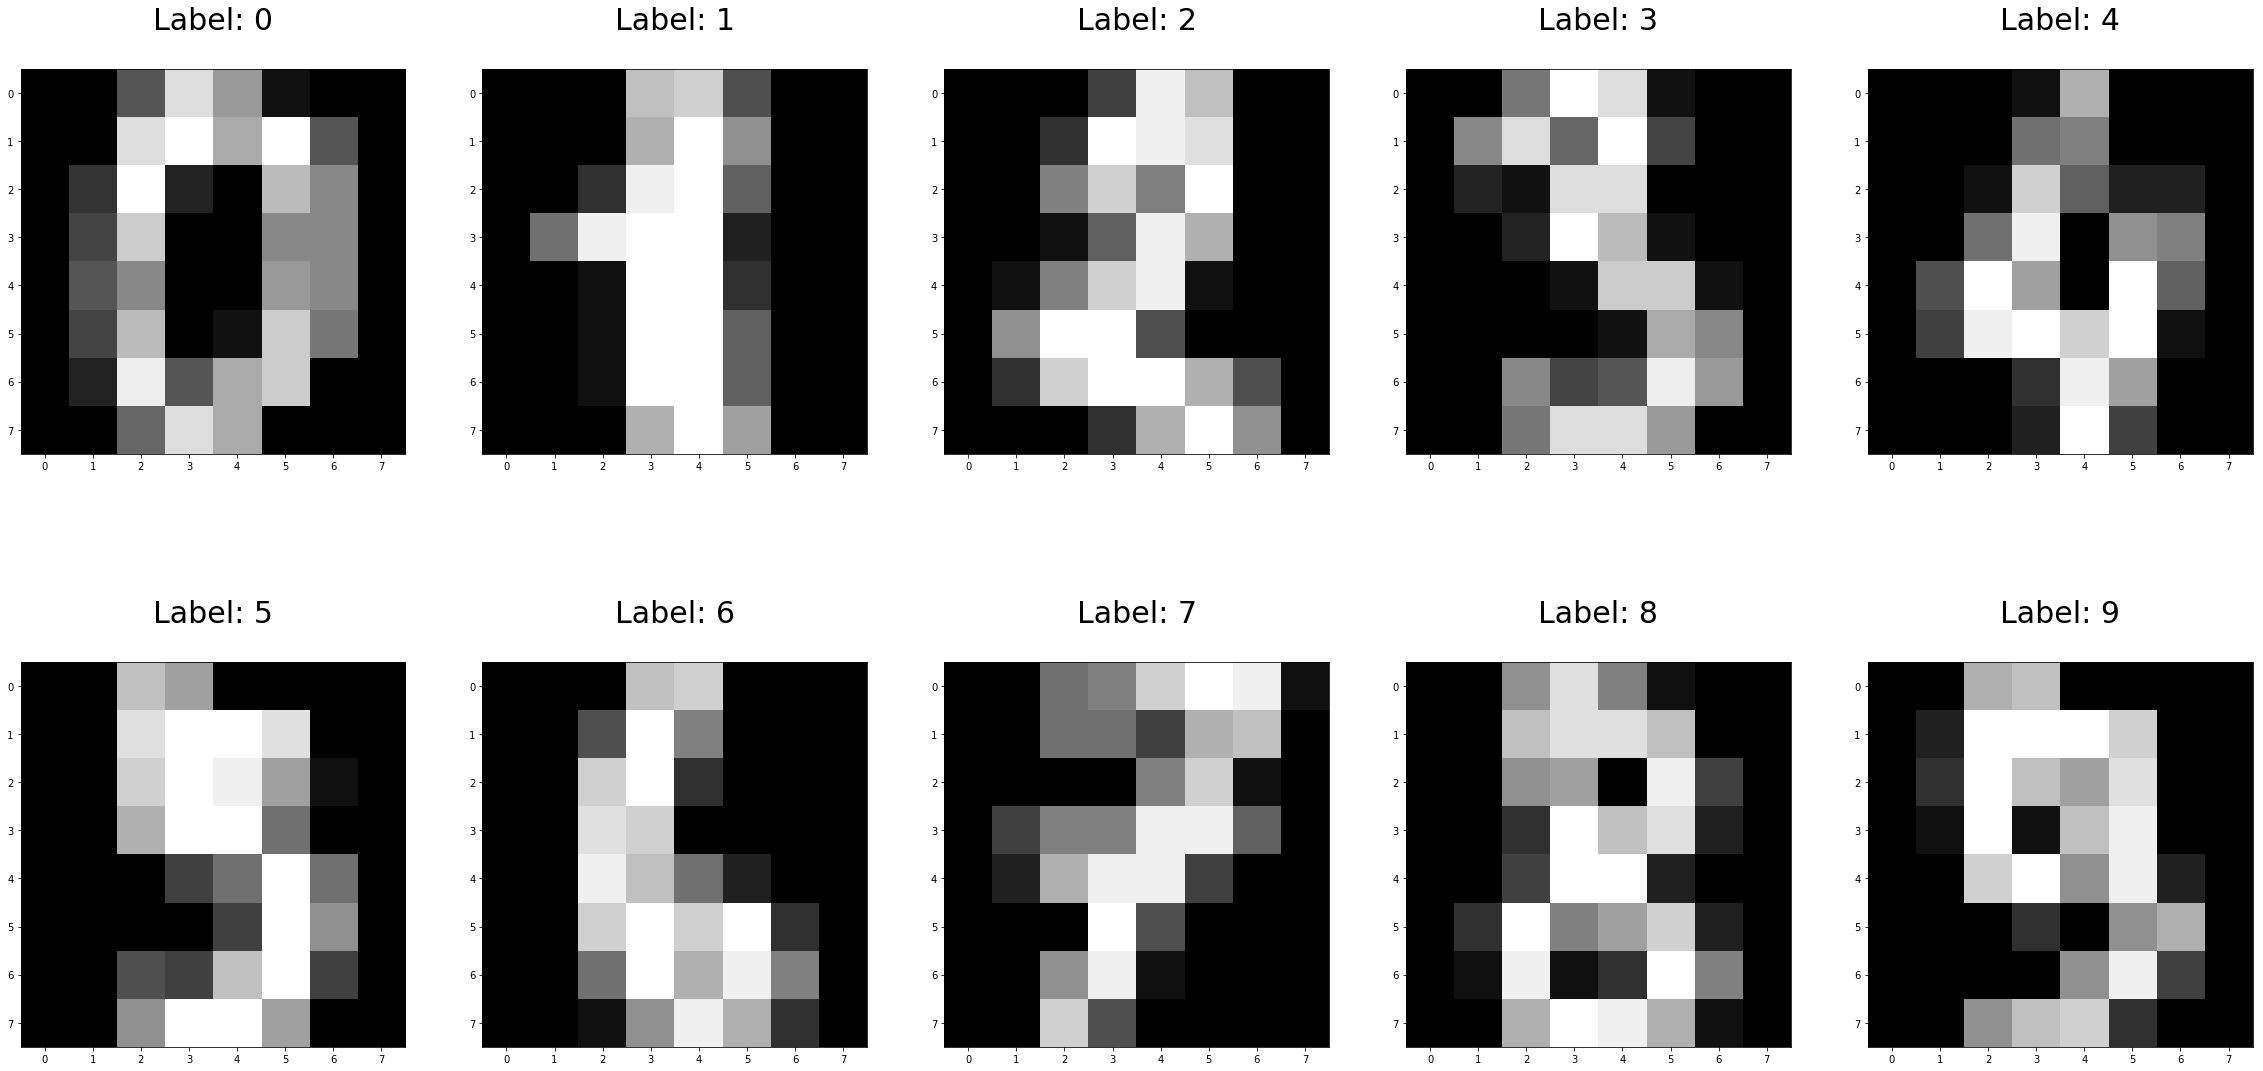

In [9]:
# display the first 10 images and their labels
plt.figure(figsize=(40, 20))
for index, (image, label) in enumerate(zip(digits.data[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    # 8 * 8 = 64
    plt.imshow(np.reshape(image, (8, 8)), cmap='gray')
    plt.title('Label: %i\n' % label, fontsize=30)
plt.show()

In [10]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=test_size, random_state=0)

In [25]:
# the KNN model
model = KNeighborsClassifier()
model.fit(x_train, y_train)
# predict the test data
knn_predictions = model.predict(x_test)
print("KNN Accuracy:  %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, knn_predictions), metrics.recall_score(y_test, knn_predictions, average='macro')))
print("\nKNN Confusion Matrix:")
print(metrics.confusion_matrix(y_test, knn_predictions))

KNN Accuracy:  0.980 	 Recall: 0.980 

KNN Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  1  1 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [26]:
# the SGD model
model = SGDClassifier()
model.fit(x_train, y_train)
sgd_predictions = model.predict(x_test)
print("SGD Accuracy:  %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, sgd_predictions), metrics.recall_score(y_test, sgd_predictions, average='macro')))
print("\nSGD Confusion Matrix:")
print(metrics.confusion_matrix(y_test, sgd_predictions))

SGD Accuracy:  0.956 	 Recall: 0.956 

SGD Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  1  1 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


In [27]:
# the DT model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
dt_predictions = model.predict(x_test)
print("DT Accuracy:   %0.3f \t Recall: %0.3f " % (metrics.accuracy_score(y_test, dt_predictions), metrics.recall_score(y_test, dt_predictions, average='macro')))
print("\nDT Confusion Matrix:")
print(metrics.confusion_matrix(y_test, dt_predictions))

DT Accuracy:   0.842 	 Recall: 0.843 

DT Confusion Matrix:
[[33  0  0  0  1  1  0  0  0  2]
 [ 0 36  2  1  1  0  0  0  1  2]
 [ 1  2 38  1  0  0  1  0  1  0]
 [ 0  0  5 37  0  0  0  0  1  2]
 [ 2  1  0  0 33  0  1  0  0  1]
 [ 1  0  0  2  1 41  0  0  0  3]
 [ 1  0  0  0  0  0 50  0  0  1]
 [ 0  1  4  1  0  2  0 37  0  3]
 [ 1  5  1  3  0  0  0  0 37  1]
 [ 0  0  2  3  1  4  0  0  0 37]]


In [40]:
# to find the best number for this data set
# when k = 1， it is overfitting
for k in range(2,20):
    # the KNN model
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train, y_train)
    # predict the test data
    knn_predictions = model.predict(x_test)
    print("KNN Accuracy when k = %s:  %0.3f \t Recall: %0.3f " % (k, metrics.accuracy_score(y_test, knn_predictions), metrics.recall_score(y_test, knn_predictions, average='macro')))

KNN Accuracy when k = 2:  0.984 	 Recall: 0.985 
KNN Accuracy when k = 3:  0.987 	 Recall: 0.987 
KNN Accuracy when k = 4:  0.980 	 Recall: 0.980 
KNN Accuracy when k = 5:  0.980 	 Recall: 0.980 
KNN Accuracy when k = 6:  0.976 	 Recall: 0.976 
KNN Accuracy when k = 7:  0.978 	 Recall: 0.978 
KNN Accuracy when k = 8:  0.978 	 Recall: 0.978 
KNN Accuracy when k = 9:  0.978 	 Recall: 0.978 
KNN Accuracy when k = 10:  0.976 	 Recall: 0.976 
KNN Accuracy when k = 11:  0.973 	 Recall: 0.974 
KNN Accuracy when k = 12:  0.973 	 Recall: 0.974 
KNN Accuracy when k = 13:  0.971 	 Recall: 0.972 
KNN Accuracy when k = 14:  0.971 	 Recall: 0.972 
KNN Accuracy when k = 15:  0.971 	 Recall: 0.972 
KNN Accuracy when k = 16:  0.969 	 Recall: 0.969 
KNN Accuracy when k = 17:  0.962 	 Recall: 0.963 
KNN Accuracy when k = 18:  0.962 	 Recall: 0.963 
KNN Accuracy when k = 19:  0.962 	 Recall: 0.963 


In [43]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
# predict the test data
knn_predictions = model.predict(x_test)

In [44]:
# display the results and confusion matrix of the best performing classifier(knn)
print("COMP9517 Week 5 Lab - z5193712")
print("\nTest size = %.2f" % test_size)

print("KNN Accuracy:  %0.3f \t Recall: %0.3f " %(metrics.accuracy_score(y_test, knn_predictions), metrics.recall_score(y_test, knn_predictions, average='macro')))
print("SGD Accuracy:  %0.3f \t Recall: %0.3f " %(metrics.accuracy_score(y_test, sgd_predictions), metrics.recall_score(y_test, sgd_predictions, average='macro')))
print("DT Accuracy:   %0.3f \t Recall: %0.3f " %(metrics.accuracy_score(y_test, dt_predictions), metrics.recall_score(y_test, dt_predictions, average='macro')))

print("\nKNN Confusion Matrix:")
print(metrics.confusion_matrix(y_test, knn_predictions))

COMP9517 Week 5 Lab - z5193712

Test size = 0.25
KNN Accuracy:  0.987 	 Recall: 0.987 
SGD Accuracy:  0.956 	 Recall: 0.956 
DT Accuracy:   0.842 	 Recall: 0.843 

KNN Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  2  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0 47]]
